In [2]:
import pandas as pd

In [16]:
pd.set_option('display.max_rows', 500)

In [5]:
df = pd.read_csv('lecture_03_data.csv',
                names = ['age',
                         'workclass',
                         'fnlwgt',
                         'education',
                         'education-num',
                         'marital-status',
                         'occupation',
                         'relationship',
                         'race',
                         'sex',
                         'capital-gain',
                         'capital-loss',
                         'hours-per-week',
                         'native-country',
                         'income'])

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
cat_vars = ['workclass',
            'education',
            'marital-status',
            'occupation',
            'relationship',
            'race',
            'sex',
            'native-country']

In [65]:
num_vars = []
for var in df.columns:
    if var not in cat_vars:
        num_vars.append(var)

In [66]:
num_vars.remove('income')
num_vars.remove('fnlwgt')

In [67]:
num_vars

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [14]:
for var in cat_vars:
    print(df[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

In [19]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [17]:
df[['occupation', 'education']].groupby(['occupation', 'education']).size()

occupation          education    
 ?                   10th             102
                     11th             119
                     12th              40
                     1st-4th           12
                     5th-6th           30
                     7th-8th           73
                     9th               51
                     Assoc-acdm        47
                     Assoc-voc         61
                     Bachelors        173
                     Doctorate         15
                     HS-grad          533
                     Masters           48
                     Preschool          5
                     Prof-school       18
                     Some-college     516
 Adm-clerical        10th              38
                     11th              67
                     12th              38
                     5th-6th            6
                     7th-8th           11
                     9th               14
                     Assoc-acdm       193


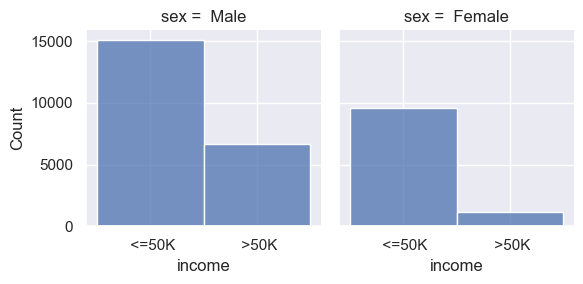

In [23]:
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.displot(
    df, x="income", col="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

In [68]:
df_num = df[num_vars]

In [69]:
df_num.head()

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [75]:
y = pd.Series([0 if v==' <=50K' else 1 for v in df['income']])

In [76]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Length: 32561, dtype: int64

In [53]:
from sklearn.linear_model import LogisticRegression

In [85]:
clf = LogisticRegression(random_state=0, penalty=None).fit(df_num, y)

In [86]:
clf.coef_

array([[4.30194840e-02, 3.22754026e-01, 3.18684527e-04, 6.99052910e-04,
        4.07239704e-02]])

In [74]:
pd.get_dummies(df['race'])

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
32556,0,0,0,0,1
32557,0,0,0,0,1
32558,0,0,0,0,1
32559,0,0,0,0,1
